## natioanl health & nutrition exam. survey 
- 2005 - 2006 code book
- FFQRAW_D.XPT: dietary interview:  total nutrient intake, first day
https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DR1TOT_D.htm#DR1TCAFF

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# open
ff = pd.read_sas('resources/DR1TOT_D.XPT')
ff.head()

/Users/yinglin/opt/anaconda3/envs/pythondata/lib/python3.9/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DAY,DR1LANG,DR1MNRSP,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,31127.0,4718.873252,5906.472362,1.0,57.0,2.0,2.0,7.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128.0,3933.789046,4250.890435,1.0,16.0,2.0,2.0,6.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31129.0,26719.805504,26719.805504,1.0,10.0,2.0,2.0,2.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
3,31130.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,13595.895940,14822.479326,1.0,16.0,2.0,2.0,6.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [4]:
ff.columns

Index(['SEQN', 'WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=160)

### col of int.
SEQN - Respondent sequence number

DR1DRSTZ - Dietary recall status

DRQSDT4 - Sugar free/Low sugar diet

DR1TKCAL - Energy (kcal)

DR1TPROT - Protein (gm)

DR1TCARB - Carbohydrate (gm)

DR1TSUGR - Total sugars (gm)

DR1TFIBE - Dietary fiber (gm)

DR1TTFAT - Total fat (gm)

DR1TSFAT - Total saturated fatty acids (gm)

DR1TCAFF - Caffeine (mg)

In [5]:
# df with col. of int. 
ff = ff.loc[:, ['SEQN', 'DR1DRSTZ', 'DRQSDT4', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB',
                'DR1TSUGR','DR1TFIBE', 'DR1TTFAT','DR1TSFAT', 'DR1TCAFF'
                ]]
ff.head()

,SEQN,DR1DRSTZ,DRQSDT4,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TCAFF
0,31127.0,1.0,NaN,1421.0,50.42,171.45,139.02,4.6,61.28,25.994,5.397605e-79
1,31128.0,1.0,NaN,1402.0,32.51,180.88,88.69,10.0,65.05,23.381,3.300000e+01
2,31129.0,1.0,NaN,4110.0,139.89,684.22,498.82,14.5,94.73,38.599,7.000000e+00
3,31130.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,1.0,NaN,1458.0,27.43,233.73,146.01,6.4,50.86,18.274,1.300000e+01


In [6]:
len(ff)

9950

In [7]:
# rename col.
ff_1 = ff.rename(columns={
                     'SEQN': 'Respondent sequence number',
                     'DR1DRSTZ':'Dietary recall status',
                     'DRQSDT4': 'Sugar free/Low sugar diet',
                     'DR1TKCAL': 'Energy (kcal)',
                     'DR1TPROT' :'Protein (gm)',
                     'DR1TCARB': 'Carbohydrate (gm)',
                     'DR1TSUGR':'Total sugars (gm)',
                     'DR1TFIBE':'Dietary fiber (gm)',
                     'DR1TTFAT': 'Total fat (gm)',
                     'DR1TSFAT': 'Total saturated fatty acids (gm)',
                     'DR1TCAFF': 'Caffeine (mg)'})
ff_1.head()


,Respondent sequence number,Dietary recall status,Sugar free/Low sugar diet,Energy (kcal),Protein (gm),Carbohydrate (gm),Total sugars (gm),Dietary fiber (gm),Total fat (gm),Total saturated fatty acids (gm),Caffeine (mg)
0,31127.0,1.0,NaN,1421.0,50.42,171.45,139.02,4.6,61.28,25.994,5.397605e-79
1,31128.0,1.0,NaN,1402.0,32.51,180.88,88.69,10.0,65.05,23.381,3.300000e+01
2,31129.0,1.0,NaN,4110.0,139.89,684.22,498.82,14.5,94.73,38.599,7.000000e+00
3,31130.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,1.0,NaN,1458.0,27.43,233.73,146.01,6.4,50.86,18.274,1.300000e+01


---
### Dietary recall status

In [8]:
ff_1['Dietary recall status'].value_counts()

1.0    9169
5.0     417
2.0     184
4.0     180
Name: Dietary recall status, dtype: int64

In [9]:
ff_1['Dietary recall status'].unique()

array([1., 5., 4., 2.])

In [10]:
ff_1['Dietary recall status'] = ff_1['Dietary recall status'].replace(
    {1: 'reliable and met the mininum criteria',
     2: 'not reliable or met the minimum criteria',
     4: 'reported consuming breast-milk ',
     5: 'not done'}
)
ff_1['Dietary recall status']

0       reliable and met the mininum criteria
1       reliable and met the mininum criteria
2       reliable and met the mininum criteria
3                                    not done
4       reliable and met the mininum criteria
                        ...                  
9945    reliable and met the mininum criteria
9946    reliable and met the mininum criteria
9947    reliable and met the mininum criteria
9948    reliable and met the mininum criteria
9949    reliable and met the mininum criteria
Name: Dietary recall status, Length: 9950, dtype: object

<AxesSubplot:ylabel='Dietary recall status'>

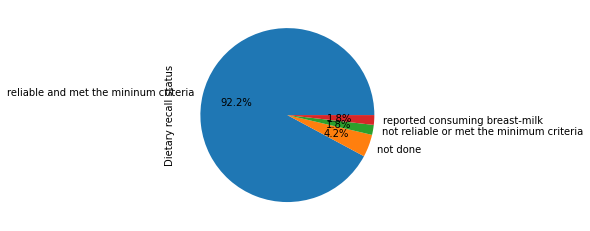

In [11]:
count_recall = ff_1['Dietary recall status'].value_counts()
count_recall.plot(kind='pie', autopct='%1.1f%%')

- most people reliable reacall their dietary status

---
### sugar free/low sugar diet

In [12]:
ff_1['Sugar free/Low sugar diet'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Sugar free/Low sugar diet, dtype: float64

In [13]:
ff_1['Sugar free/Low sugar diet'].unique()

array([nan,  4.])

In [14]:
ff_1['Sugar free/Low sugar diet'].value_counts()
# 4:  sugar free or low sugar diet 
# NaN: missing 

4.0    67
Name: Sugar free/Low sugar diet, dtype: int64

In [15]:
count_sugarF = ff_1['Sugar free/Low sugar diet'].value_counts()
count_sugarF
# 4:  sugar free or low sugar diet 
# NaN: missing 

4.0    67
Name: Sugar free/Low sugar diet, dtype: int64

<AxesSubplot:ylabel='Sugar free/Low sugar diet'>

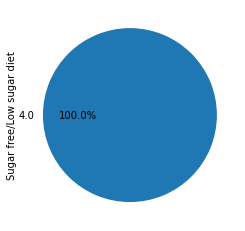

In [16]:
count_sugarF.plot(kind='pie', autopct='%1.1f%%')

- almost 100% people are NOT on a sugarfree/low sugar diet

---
### energy (kcal/day)


In [71]:
cal = ff_1['Energy (kcal)'].value_counts()
cal


1456.0    13
1864.0    12
1934.0    11
1583.0    11
1514.0    11
          ..
282.0      1
541.0      1
486.0      1
4479.0     1
3207.0     1
Name: Energy (kcal), Length: 3288, dtype: int64

Text(0, 0.5, 'count')

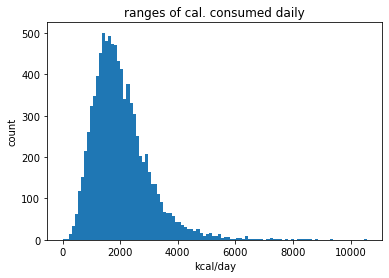

In [63]:
plt.hist(ff_1['Energy (kcal)'].values, bins=100)
plt.title('ranges of cal. consumed daily')
plt.xlabel('kcal/day')
plt.ylabel('count')

- most of the people consume around 2000 kcal/daily
---
### protein (gm)

In [60]:
protein = ff_1['Protein (gm)'].value_counts()
protein

65.20    5
58.16    5
55.78    4
40.59    4
55.72    4
        ..
50.94    1
70.14    1
83.98    1
82.94    1
79.15    1
Name: Protein (gm), Length: 7944, dtype: int64

Text(0, 0.5, 'count')

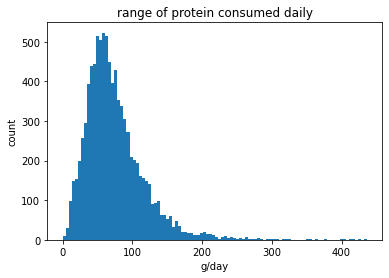

In [70]:
plt.hist(ff_1['Protein (gm)'].values, bins=100)
plt.title('range of protein consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

- most people consumed between 75 to 100 g/day

---
### carb. (gm)

In [38]:
count_carb = ff_1['Carbohydrate (gm)'].value_counts()
count_carb

75.42     4
171.45    3
228.84    3
241.64    3
335.35    3
         ..
159.22    1
238.09    1
86.47     1
223.46    1
514.49    1
Name: Carbohydrate (gm), Length: 8765, dtype: int64

Text(0, 0.5, 'count')

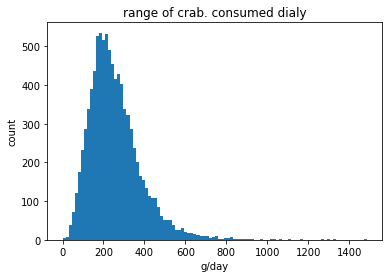

In [72]:
plt.hist(ff_1['Carbohydrate (gm)'].values, bins=100)
plt.title('range of crab. consumed dialy')
plt.xlabel('g/day')
plt.ylabel('count')

- most people consumed 180 to 400 g/day

---
### dietary fiber (gm)

In [48]:
count_fib = ff_1['Dietary fiber (gm)'].value_counts()
count_fib

5.397605e-79    97
8.200000e+00    48
7.500000e+00    47
9.500000e+00    47
1.050000e+01    46
                ..
4.230000e+01     1
4.500000e+01     1
1.100000e+00     1
3.240000e+01     1
4.070000e+01     1
Name: Dietary fiber (gm), Length: 1249, dtype: int64

Text(0, 0.5, 'count')

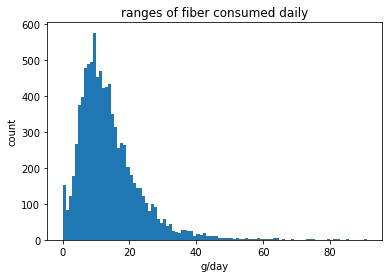

In [73]:
plt.hist(ff_1['Dietary fiber (gm)'].values, bins=100)
plt.title('ranges of fiber consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

- most people consumed around 12 to 18g of fiber

---
### total fat (gm)

In [53]:
fat = ff_1['Total fat (gm)'].value_counts()
fat

35.74     5
38.89     5
34.56     5
66.12     5
94.26     4
         ..
37.28     1
39.83     1
151.32    1
65.56     1
96.47     1
Name: Total fat (gm), Length: 7960, dtype: int64

Text(0, 0.5, 'count')

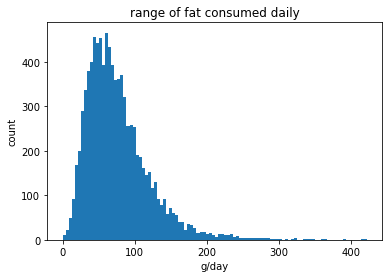

In [74]:
plt.hist(ff_1['Total fat (gm)'].values, bins=100)
plt.title('range of fat consumed daily')
plt.xlabel('g/day')
plt.ylabel('count')

---
### seaborn correlation

In [23]:
ff_1.columns

Index(['Respondent sequence number', 'Dietary recall status',
       'Sugar free/Low sugar diet', 'Energy (kcal)', 'Protein (gm)',
       'Carbohydrate (gm)', 'Total sugars (gm)', 'Dietary fiber (gm)',
       'Total fat (gm)', 'Total saturated fatty acids (gm)', 'Caffeine (mg)'],
      dtype='object')

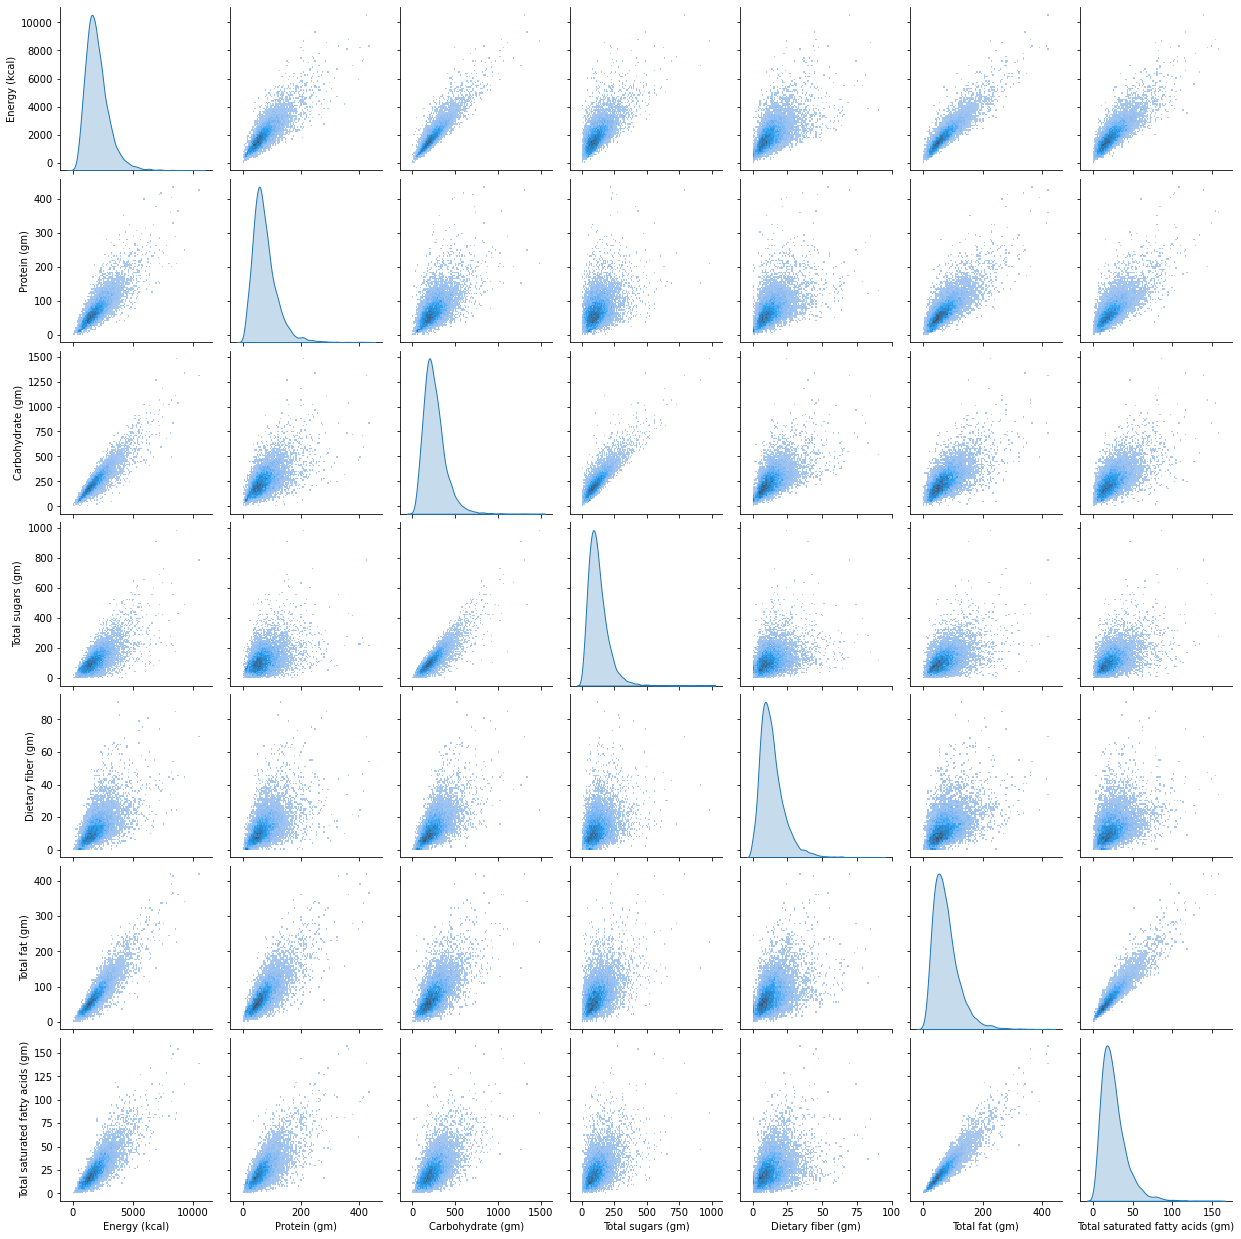

In [24]:
sns.pairplot(ff_1[['Energy (kcal)', 'Protein (gm)', 'Carbohydrate (gm)',
                   'Total sugars (gm)', 'Dietary fiber (gm)', 'Total fat (gm)',
                   'Total saturated fatty acids (gm)']],
                   diag_kind='kde', kind='hist')